In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

train = pd.read_csv("./input/mnist_train.csv")
print(train.shape)
train.head()

/Users/Ashu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
test = pd.read_csv("./input/mnist_test.csv")
print(test.shape)
test.head()

(10000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis = 1)

In [4]:
y_test = test["label"]
x_test = test.drop(labels = ["label"], axis = 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
from keras.utils.np_utils import to_categorical 
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)
x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)
print("x_train shape", X_train.shape)
print("x_test shape", X_val.shape)
print("y_train shape", Y_train.shape)
print("y_test shape", Y_val.shape)

x_train shape (54000, 28, 28, 1)
x_test shape (6000, 28, 28, 1)
y_train shape (54000, 10)
y_test shape (6000, 10)


In [6]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [7]:
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [8]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [9]:
epochs = 10
batch_size = 250

In [10]:
datagen = ImageDataGenerator(
        featurewise_center = False,
        samplewise_center = False,
        featurewise_std_normalization = False,  
        samplewise_std_normalization = False, 
        zca_whitening = False,
        rotation_range = 5,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        horizontal_flip = False,
        vertical_flip = False
)

datagen.fit(X_train)

In [11]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size), epochs = epochs, validation_data = (X_val, Y_val), steps_per_epoch = X_train.shape[0] // batch_size)

Epoch 1/10
216/216 [==============================] - 104s 347ms/step - loss: 1.3867 - accuracy: 0.5255 - val_loss: 0.1652 - val_accuracy: 0.9545
Epoch 2/10
216/216 [==============================] - 80s 371ms/step - loss: 0.3978 - accuracy: 0.8741 - val_loss: 0.1085 - val_accuracy: 0.9692
Epoch 3/10
216/216 [==============================] - 119s 553ms/step - loss: 0.2908 - accuracy: 0.9114 - val_loss: 0.0859 - val_accuracy: 0.9738
Epoch 4/10
216/216 [==============================] - 61s 283ms/step - loss: 0.2303 - accuracy: 0.9289 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 5/10
216/216 [==============================] - 74s 343ms/step - loss: 0.2089 - accuracy: 0.9354 - val_loss: 0.0687 - val_accuracy: 0.9780
Epoch 6/10
216/216 [==============================] - 75s 346ms/step - loss: 0.1852 - accuracy: 0.9444 - val_loss: 0.0627 - val_accuracy: 0.9797
Epoch 7/10
216/216 [==============================] - 68s 311ms/step - loss: 0.1736 - accuracy: 0.9482 - val_loss: 0.0568 - val_

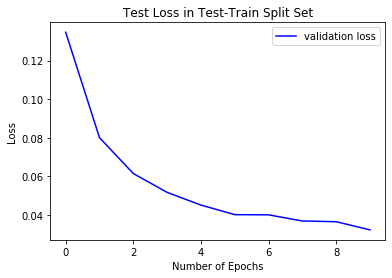

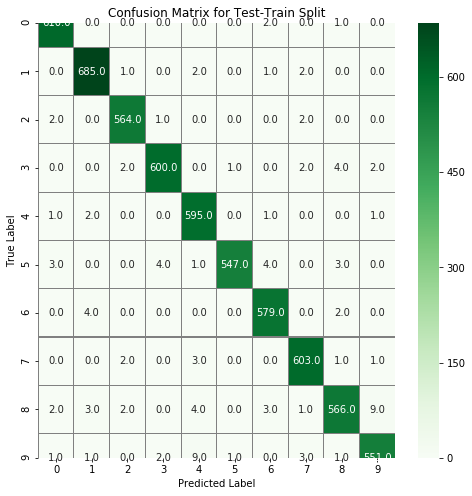

In [16]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss in Test-Train Split Set")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Test-Train Split")
plt.show()

Epoch 1/10
240/240 [==============================] - 65s 265ms/step - loss: 1.4084 - acc: 0.5123 - val_loss: 0.1531 - val_acc: 0.9551
Epoch 2/10
240/240 [==============================] - 61s 253ms/step - loss: 0.3800 - acc: 0.8778 - val_loss: 0.0868 - val_acc: 0.9721
Epoch 3/10
240/240 [==============================] - 51s 212ms/step - loss: 0.2780 - acc: 0.9169 - val_loss: 0.0687 - val_acc: 0.9783
Epoch 4/10
240/240 [==============================] - 57s 236ms/step - loss: 0.2369 - acc: 0.9287 - val_loss: 0.0607 - val_acc: 0.9807
Epoch 5/10
240/240 [==============================] - 58s 241ms/step - loss: 0.2150 - acc: 0.9340 - val_loss: 0.0509 - val_acc: 0.9834
Epoch 6/10
240/240 [==============================] - 59s 243ms/step - loss: 0.1878 - acc: 0.9417 - val_loss: 0.0455 - val_acc: 0.9851
Epoch 7/10
240/240 [==============================] - 61s 254ms/step - loss: 0.1746 - acc: 0.9469 - val_loss: 0.0402 - val_acc: 0.9869
Epoch 8/10
240/240 [==============================] - 6

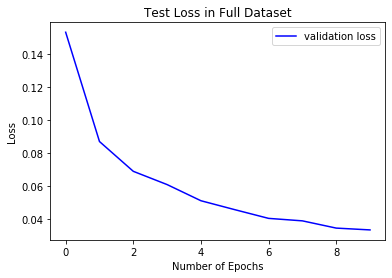

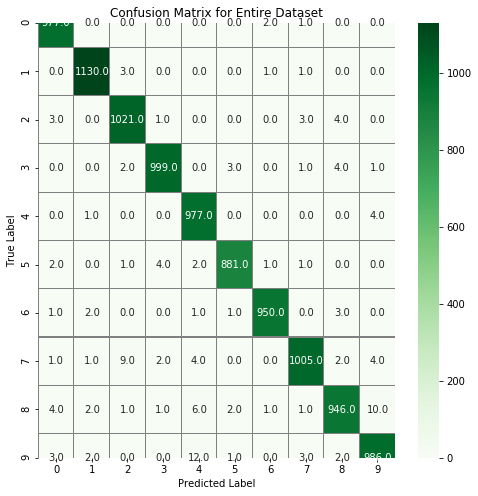

In [17]:
full_model = Sequential()
full_model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
full_model.add(MaxPool2D(pool_size=(2,2)))
full_model.add(Dropout(0.25))
full_model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
full_model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
full_model.add(Dropout(0.25))
full_model.add(Flatten())
full_model.add(Dense(256, activation = "relu"))
full_model.add(Dropout(0.5))
full_model.add(Dense(10, activation = "softmax"))

opt = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

full_model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["acc"])

datagen.fit(x_train)

history = full_model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = (x_test, y_test), steps_per_epoch = x_train.shape[0] // batch_size)


plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss in Full Dataset")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Entire Dataset")
plt.show()

In [1]:
print("This model has around the same accuracy and loss present in the Kaggle tutorial. It uses more data, however, and increasing the epochs would increase accuracy.")

This model has around the same accuracy and loss present in the Kaggle tutorial. It uses more data, however, and increasing the epochs would increase accuracy.
